<a href="https://colab.research.google.com/github/developeravsk/Machine-Learning-Projects/blob/main/VisionProjects/Cat_vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 42.1MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.9MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [8]:
# generators
# divides data into batches, loads small batch on RAM

# using image_dataset_from_directory

train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize the dataset
def process(image, label):
  image=tf.cast(image/255., tf.float32)
  return image, label

train_ds=train_dataset.map(process)
validation_ds=validation_dataset.map(process)

In [10]:
# create CNN model

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 115ms/step - loss: 0.6134 - accuracy: 0.6538 - val_loss: 0.5509 - val_accuracy: 0.7296
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4666 - accuracy: 0.7796 - val_loss: 0.4629 - val_accuracy: 0.7874
Epoch 3/10
625/625 [==============================] - 56s 88ms/step - loss: 0.3692 - accuracy: 0.8330 - val_loss: 0.5417 - val_accuracy: 0.7712
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.2325 - accuracy: 0.9051 - val_loss: 0.7317 - val_accuracy: 0.7620
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1282 - accuracy: 0.9510 - val_loss: 0.9718 - val_accuracy: 0.7790
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0819 - accuracy: 0.9710 - val_loss: 1.0081 - val_accuracy: 0.7556
Epoch 7/10
625/625 [==============================] - 55s 86ms/step - loss: 0.0577 - accuracy: 0.9792 - val_loss: 1.1353 - val_accurac

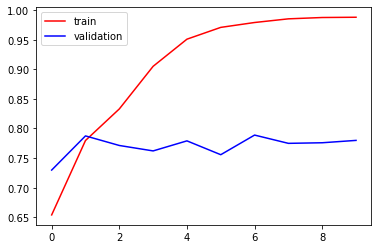

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

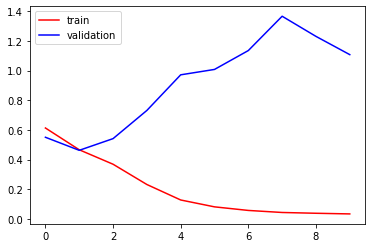

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [16]:
# ways to reduce overfitting

# add more data
# data augmentation: Create more data using existing data
# L1/L2 regularizer
# dropout
# batch norm
# reduce complexity


In [19]:
# Batch Normalization and dropout
from keras.layers import BatchNormalization, Dropout

# create CNN model

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.3357 - accuracy: 0.5938 - val_loss: 0.5939 - val_accuracy: 0.6882
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5677 - accuracy: 0.7118 - val_loss: 0.6382 - val_accuracy: 0.6326
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5373 - accuracy: 0.7466 - val_loss: 0.4548 - val_accuracy: 0.7838
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4393 - accuracy: 0.7968 - val_loss: 0.5452 - val_accuracy: 0.7268
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3870 - accuracy: 0.8253 - val_loss: 0.4392 - val_accuracy: 0.7966
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3428 - accuracy: 0.8511 - val_loss: 0.4285 - val_accuracy: 0.8002
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2594 - accuracy: 0.8913 - val_loss: 0.4952 - val_ac

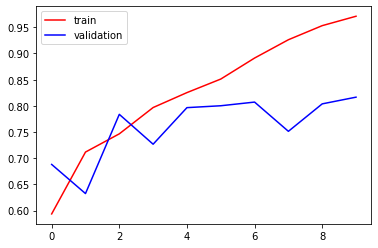

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

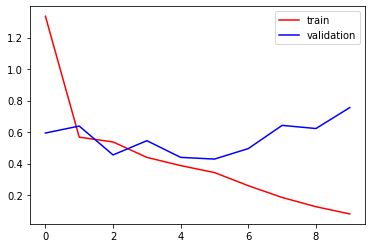

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [40]:
# Testing an unseen image


In [39]:
import cv2
import numpy as np

# Load the test image
test_img = cv2.imread('/content/cats.jpg')

# Resize the image to (256, 256)
test_image = cv2.resize(test_img, (256, 256))

# Convert to floating point values and normalize
test_img = test_image.astype(np.float32) / 255.0

# Add a batch dimension
test_input = np.expand_dims(test_img, axis=0)

model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.00010761]], dtype=float32)

In [41]:
import cv2
import numpy as np

# Load the test image
test_img = cv2.imread('/content/dogs.jpg')

# Resize the image to (256, 256)
test_image = cv2.resize(test_img, (256, 256))

# Convert to floating point values and normalize
test_img = test_image.astype(np.float32) / 255.0

# Add a batch dimension
test_input = np.expand_dims(test_img, axis=0)

model.predict(test_input)

1/1 [==============================] - 0s 87ms/step


array([[0.9231741]], dtype=float32)